In [268]:
import numpy as np
from itertools import combinations

V = np.random.rand(20, 2)

# Generate a random array of edges
E = list(combinations([i for i in range(len(V))], 2))
E = [E[i] for i in np.random.randint(0, len(E), size=20)]
E = np.array(E)

print(V[:5], "...")
print(E[:5], "...")

[[0.83868511 0.18963822]
 [0.66149817 0.54604083]
 [0.04554913 0.94576422]
 [0.42295688 0.68500089]
 [0.52910998 0.83032949]] ...
[[ 2 15]
 [ 4 15]
 [ 6 18]
 [ 6 13]
 [ 6  7]] ...


In [277]:
import matplotlib.pyplot as plt


def draw_graph(V, E):
  # Draw vertices
  plt.plot(V[:,0], V[:,1], 'bo')

  # Draw edges
  for p_idx, q_idx in E:
    xs = []
    ys = []
    xs.append(V[p_idx][0])
    xs.append(V[q_idx][0])
    ys.append(V[p_idx][1])
    ys.append(V[q_idx][1])
    plt.plot(xs, ys, '-')
    plt.axis([-0.1, 1.1, -0.1, 1.1])

  plt.show()

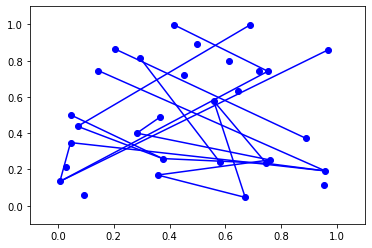

In [259]:
draw_graph(V, E)

Maximize: $d_1(a, b) + d_1(b, c)$
$= |x(a) - x(b)| + |y(a) - y(b)| + |x(b) - x(c)| + |y(b) - y(c)|$

Can be rewritten to (while ignoring the absolute value function:
* $1 \cdot x(a)$
* $0 \cdot x(b)$
* $-1 \cdot x(c)$
* $1 \cdot y(a)$
* $0 \cdot y(b)$
* $-1 \cdot y(c)$

In [275]:
from scipy.optimize import linprog
from itertools import combinations

EPS = 0.02

tr = combinations(range(len(V)), 3)
obj_x = np.zeros(len(V))
obj_y = np.zeros(len(V))
le = []
ri = []
for p, q, r in tr:
  obj_x[p] += 1
  obj_y[p] += 1
  obj_x[r] -= 1
  obj_y[r] -= 1
  
obj = np.append(obj_x, obj_y)
obj = np.multiply(obj, -1)

# get bounds
bnds_x = []
bnds_y = []
for x, y in V:
  bnd_x = [x - EPS, x + EPS]
  bnd_y = [y - EPS, y + EPS]
  bnds_x.append(bnd_x)
  bnds_y.append(bnd_y)
bnds = bnds_x + bnds_y
# bnds = np.multiply(bnds, -1)

sol = linprog(c=obj, bounds=bnds)
print(sol)
sol = sol.x

# convert to a proper vertex format
xs = np.array(sol[:len(V)])
ys = np.array(sol[len(V):])
xs = np.expand_dims(xs, axis=1)
ys = np.expand_dims(ys, axis=1)
V_sol = np.append(xs, ys, axis=1)


     con: array([], dtype=float64)
     fun: -387.5866210702279
 message: 'The solution was determined in presolve as there are no non-trivial constraints.'
     nit: 0
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 0.85868511,  0.68149817,  0.06554913,  0.44295688,  0.54910998,
        0.78645782,  0.75271203,  0.63711465,  0.09219949,  0.79936911,
        0.32565062,  0.57243789, -0.00133621,  0.56536285,  0.76299788,
        0.52848592,  0.0090576 ,  0.81012134,  0.04049628,  0.00420342,
        0.20963822,  0.56604083,  0.96576422,  0.70500089,  0.85032949,
        0.32073074,  0.50112873,  0.16163697,  0.76267573,  0.85079944,
        0.7637604 ,  0.75414862,  0.05330155,  0.58126584,  0.11113607,
        0.73101337,  0.49882082,  0.57179002,  0.1086302 ,  0.32394977])


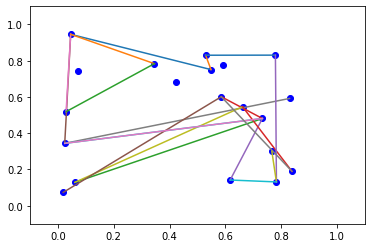

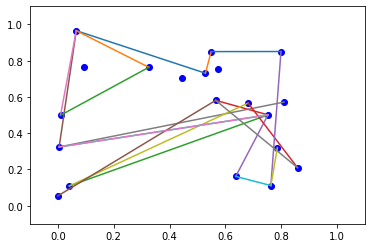

In [278]:
draw_graph(V, E)
draw_graph(V_sol, E)